# <center> MATH&ML-10. Итоговая практика по алгоритмам кластеризации

In [122]:
#импорты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import cluster
from sklearn import metrics
import seaborn as sns
from collections import Counter

In [123]:
# Импорт данных
cc_data = pd.read_csv('data/CC GENERAL.csv')
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


CUST_ID — идентификационный номер держателя карты;

BALANCE — баланс, доступный для совершения покупок;

BALANCEFREQUENCY — как часто обновляется показатель баланса (1 — часто, 0 — нечасто);

PURCHASES — количество покупок, оплаченных со счёта;

ONEOFFPURCHASES — максимальная сумма единовременной покупки;

INSTALLMENTSPURCHASES — сумма покупок, сделанных в рассрочку;

PURCHASESFREQUENCY — как часто в целом совершаются покупки (1 — часто, 0 — нечасто);

ONEOFFPURCHASESFREQUENCY — частота совершения единовременных покупок (1 — часто, 0 — нечасто);

PURCHASESINSTALLMENTSFREQUENCY — частота совершения покупок в рассрочку (1 — часто, 0 — нечасто);

CASHADVANCEFREQUENCY — частота внесения авансовых платежей;

CASHADVANCETRX — количество транзакций с авансовыми взносами;

PURCHASESTRX — количество совершённых транзакций с покупками;

CREDITLIMIT — кредитный лимит держателя карты;

PAYMENTS — сумма платежей пользователя;

MINIMUM_PAYMENTS — сумма минимального платежа пользователя;

PRCFULLPAYMENT — выплаченный процент от полного платежа;

TENURE — срок обслуживания кредитной карты.

In [124]:
#Задание 7.2
print('Всего пропусков:', cc_data.isna().sum().sum())
cc_data.info()

Всего пропусков: 314
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null 

In [125]:
#Удалим ненужный признак
cc_data = cc_data.drop('CUST_ID', axis=1)

In [126]:
#Задание 7.3
# Заполняем пропуски в данных
for column in cc_data.columns:
    if cc_data[column].isna().sum() != 0:
        cc_data[column] = cc_data[column].fillna(cc_data[column].mean())
    else:
        pass

print('Среднее признака MINIMUM_PAYMENTS:', round(cc_data['MINIMUM_PAYMENTS'].mean(), 2))
print('-'*20)
cc_data.info()

Среднее признака MINIMUM_PAYMENTS: 864.21
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHA

In [127]:
#Задание 7.4
scaler = preprocessing.StandardScaler()
scaler.fit(cc_data)
X_norm = scaler.transform(cc_data)
print('Первое значение в первой строке:', round(X_norm[0][0], 2))

Первое значение в первой строке: -0.73


<Axes: xlabel='cluster', ylabel='silhouette'>

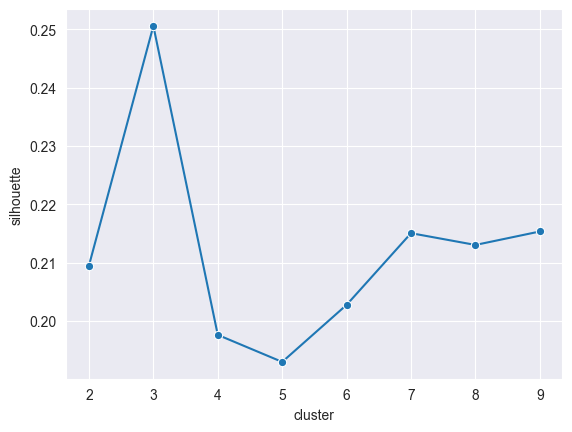

In [ ]:
#Задание 7.5

# напишем функцию
def get_silhouette(cluster_num, X):
    k_means = cluster.KMeans(n_clusters=cluster_num, init='random', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_norm))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

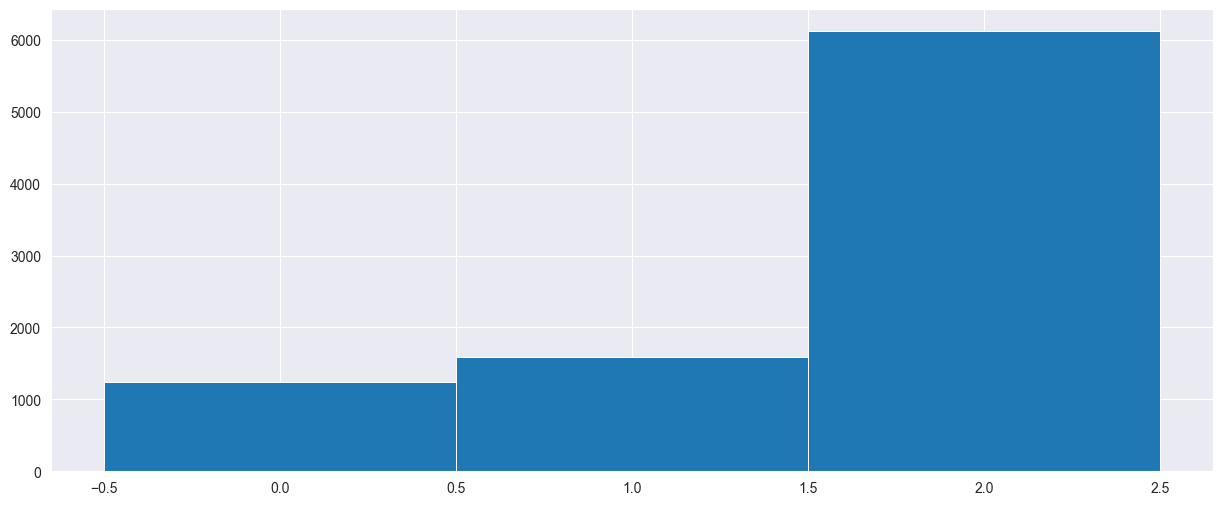

Людей, относящихся к наиболее распространенному кластеру: 6119
Людей, относящихся к наименее распространенному кластеру: 1235


In [129]:
#Задание 7.6

kmeans_model = cluster.KMeans(random_state=42, init='random', n_clusters=3)
kmeans_model.fit(X_norm)

cluster_counts = Counter(kmeans_model.labels_)

# Сортируем по номерам кластеров
clusters = sorted(cluster_counts.keys())
counts = [cluster_counts[cluster] for cluster in clusters]
counts_greatest_cluster = cluster_counts[2]
counts_least_cluster = cluster_counts[0]

plt.figure(figsize=(15, 6))
plt.bar(clusters, counts, width=1, linewidth=0.7)

plt.show()

print('Людей, относящихся к наиболее распространенному кластеру:', counts_greatest_cluster)
print('Людей, относящихся к наименее распространенному кластеру:', counts_least_cluster)

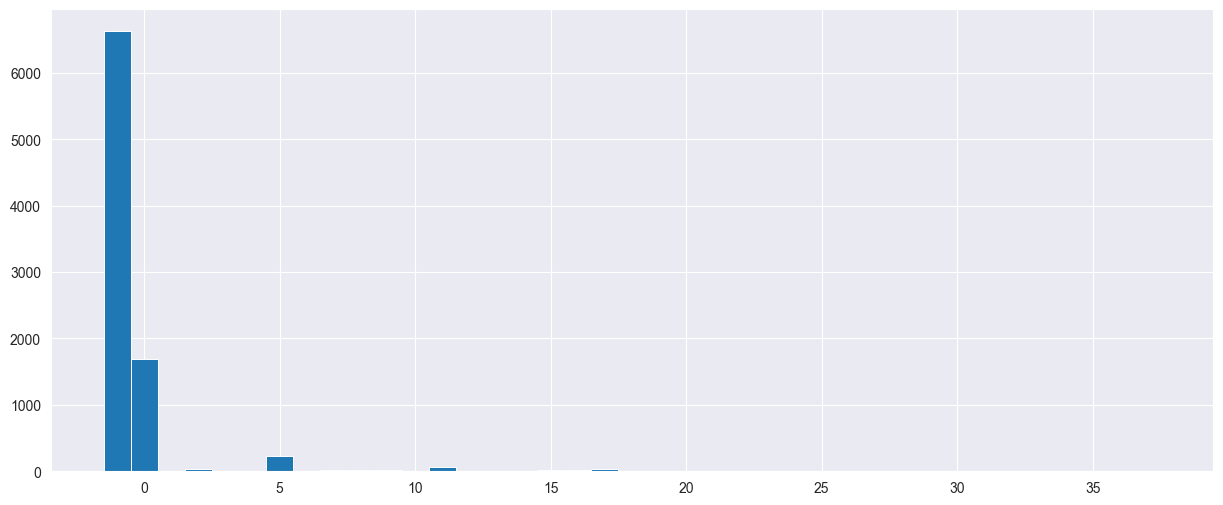

Количество выделенных кластеров: 39


In [130]:
#Задание 7.7
dbscan_model = cluster.DBSCAN()
dbscan_model.fit(X_norm)

cluster_counts = Counter(dbscan_model.labels_)

# Сортируем по номерам кластеров
clusters = sorted(cluster_counts.keys())
counts = [cluster_counts[cluster] for cluster in clusters]

plt.figure(figsize=(15, 6))
plt.bar(clusters, counts, width=1, linewidth=0.7)

plt.show()

print('Количество выделенных кластеров:', len(cluster_counts))

In [133]:
# Задание 7.8

epses = np.arange(0.1,3,0.2)
samples = range(1,20,4)
silhouette = -9999

for eps in epses:
    for min_samples in samples:
        
        dbscan_model_optimal = cluster.DBSCAN(eps=eps, min_samples=min_samples)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
        silhouette_new = metrics.silhouette_score(X_norm, dbscan_model_optimal.fit_predict(X_norm))
        if silhouette_new > silhouette:
            silhouette = silhouette_new
            
            #Для удобства
            silhouette_res = {"silhouette": [], 'eps': [], 'min_samples': [], 'clusters': []}
            
            silhouette_res["silhouette"].append(np.round(silhouette, 2))
            silhouette_res['eps'].append(np.round(eps, 2))
            silhouette_res['min_samples'].append(np.round(min_samples))
            silhouette_res['clusters'].append(len(Counter(dbscan_model_optimal.labels_)))

silhouette_res

{'silhouette': [0.62], 'eps': [2.9], 'min_samples': [5], 'clusters': [2]}

,silhouette,cluster
0,0.173110,3
1,0.154709,4
2,0.158069,5
3,0.173356,6
4,0.156415,7
5,0.152035,8
6,0.153719,9


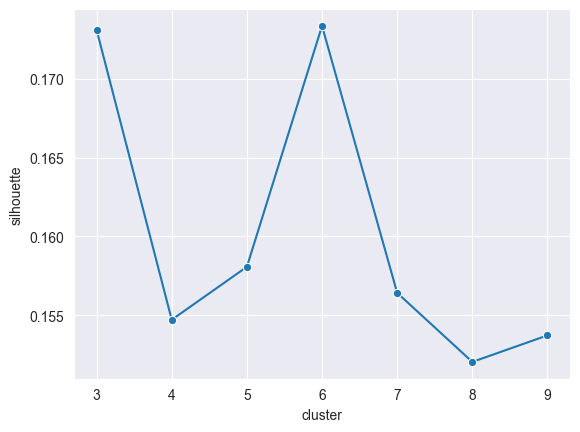

In [ ]:
#Задание 7.9

# перепишем функцию
def get_silhouette(cluster_num, X):
    aglo_clust = cluster.AgglomerativeClustering(n_clusters=cluster_num)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, aglo_clust.fit_predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_norm))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

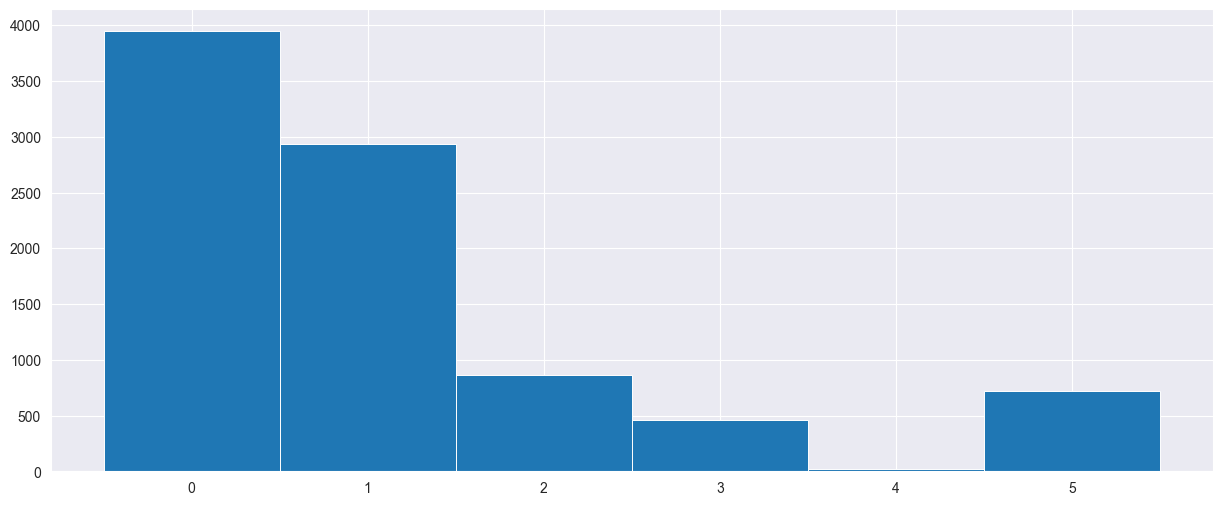

Людей, относящихся к наиболее распространенному кластеру: 3946
Людей, относящихся к наименее распространенному кластеру: 23


In [144]:
#Задание 7.10
aglo_clust_model = cluster.AgglomerativeClustering(n_clusters=6)
aglo_clust_model.fit(X_norm)

cluster_counts = Counter(aglo_clust_model.labels_)

# Сортируем по номерам кластеров
clusters = sorted(cluster_counts.keys())
counts = [cluster_counts[cluster] for cluster in clusters]
counts_greatest_cluster = cluster_counts[0]
counts_least_cluster = cluster_counts[4]

plt.figure(figsize=(15, 6))
plt.bar(clusters, counts, width=1, linewidth=0.7)

plt.show()

print('Людей, относящихся к наиболее распространенному кластеру:', counts_greatest_cluster)
print('Людей, относящихся к наименее распространенному кластеру:', counts_least_cluster)

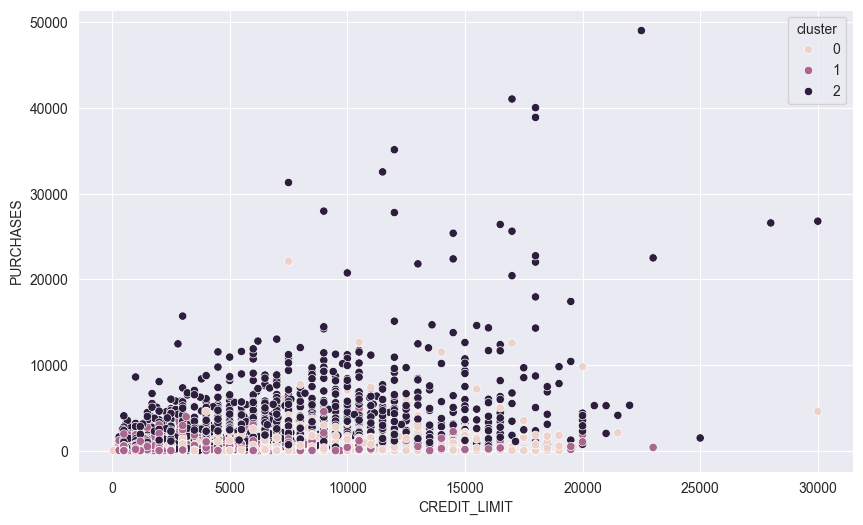

In [145]:
# Визуализация кластеризации

kmeans = cluster.KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
cc_data['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=cc_data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()

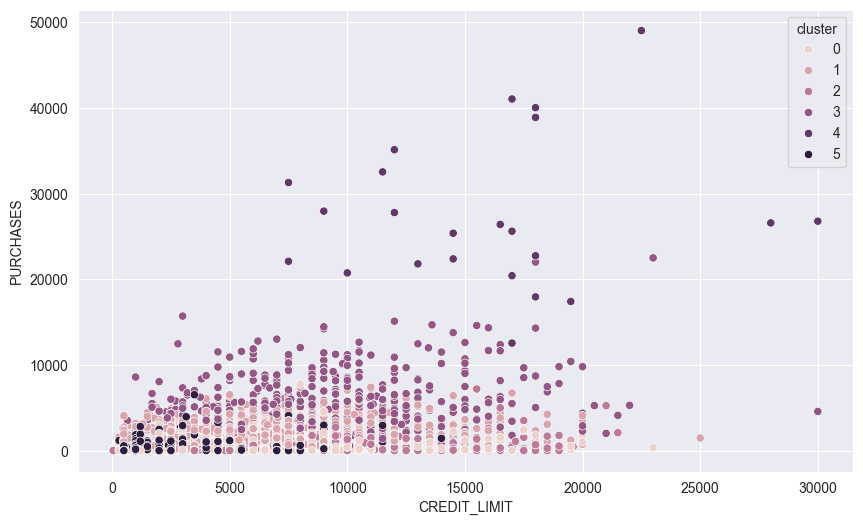

In [146]:
cc_data['cluster'] = aglo_clust_model.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=cc_data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()